# 1. Supervised Learning - Regression (Part 2)

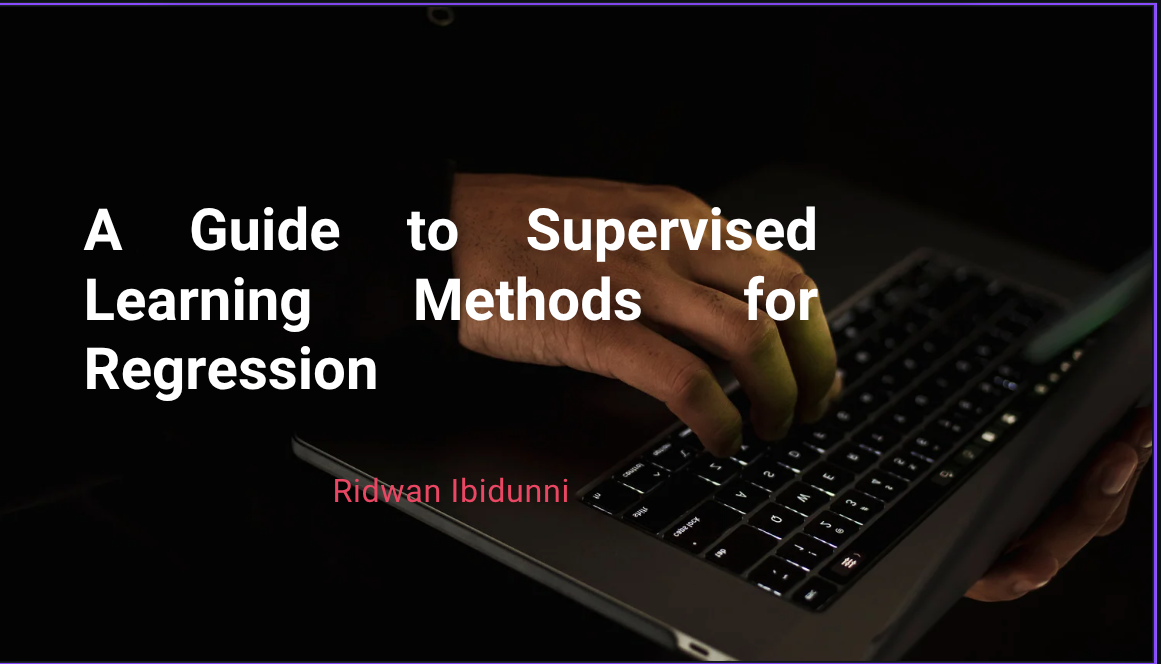

## Beyond Linear Models: When Complexity Becomes a Problem

**LESSON 3: ADVANCED REGRESSION - OVERFITTING & REGULARIZATION**

- **Building on Lesson 2: We saw polynomial models can overfit.**

- **Today: Learn to detect overfitting and fix it with regularization!**

### Key Questions for Advanced Regression:

* How do we detect overfitting before it's too late?
* What happens when features are highly correlated (multicollinearity)?  
* How do we balance model complexity with generalization?
* When should we sacrifice training accuracy for better real-world performance?


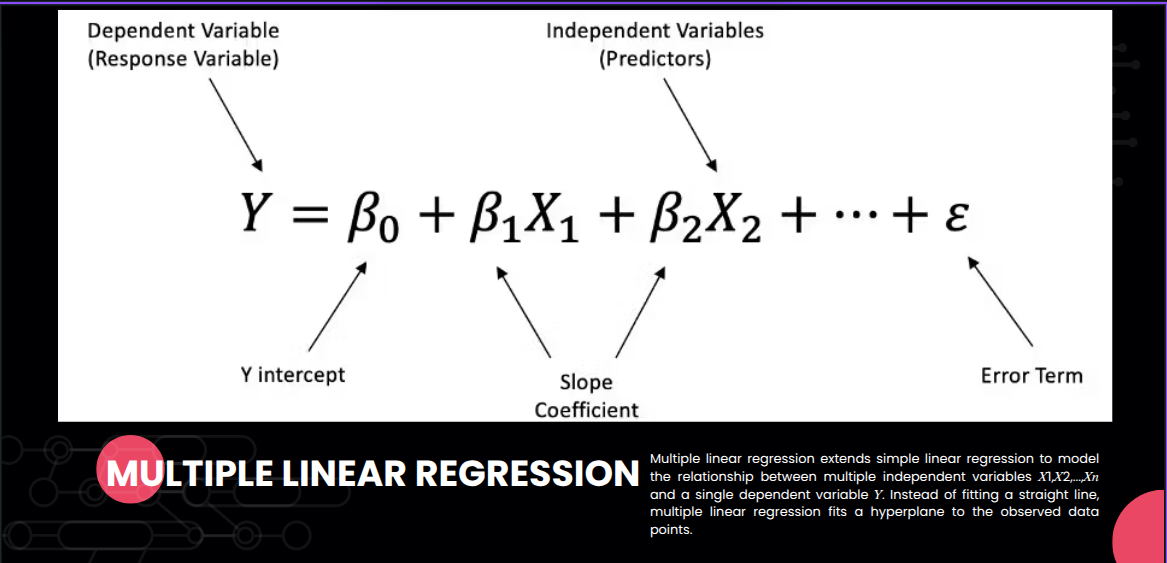

**Key Questions to Frame Any Regression Problem:**
- Does the relationship involve multiple independent variables?
- Are the relationships between features and target linear or curved?
- How do features interact with each other?
- What level of model complexity is appropriate for our data size?

# Problem Statement: Predicting Building Energy Efficiency

### **Scenario:**  A sustainable architecture firm aims to optimize energy consumption by predicting heating and cooling loads during the design phase.

### **The Challenge:** Building energy depends on complex interactions of multiple design factors, which traditional methods struggle to efficiently capture.

### **Your ML Task:** Build regression models to predict heating and cooling loads based on building parameters (e.g., surface area, window features, height, glazing).

### **Goal:** Enable design optimization, cost prediction, and achievement of sustainability targets.


# Data Acquisition and Initial Inspection

In [ ]:
# Beyond simple regression: Multiple features reality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Energy Efficiency Dataset (UCI Repository - cleaned version)
# Dataset: Energy efficiency of buildings based on design parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

energy_df = pd.read_excel(url)

energy_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28



[Check Dataset from its source](https://archive.ics.uci.edu/dataset/242/energy+efficiency)



In [ ]:
# Rename columns for clarity
energy_df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area',
                     'Roof_Area', 'Overall_Height', 'Orientation',
                     'Glazing_Area', 'Glazing_Area_Distribution',
                     'Heating_Load', 'Cooling_Load']

In [ ]:
energy_df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [ ]:
# Quick overview
print(f"Dataset shape: {energy_df.shape}")
print("\nBuilding Energy Efficiency Dataset:")
print("Predicting heating and cooling loads for sustainable building design")
print("\nFeature statistics:")
energy_df.describe().T

Dataset shape: (768, 10)

Building Energy Efficiency Dataset:
Predicting heating and cooling loads for sustainable building design

Feature statistics:


,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [ ]:
# Check data types and missing values
print(f"\nData types:\n{energy_df.dtypes}")
print(f"\nMissing values: {energy_df.isnull().sum().sum()}")


Data types:
Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

Missing values: 0


In [ ]:
energy_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
print(f"\nData types:\n{energy_df.dtypes}")


Data types:
Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object


# . Polynomial Regression: Capturing Non-linear Relationships

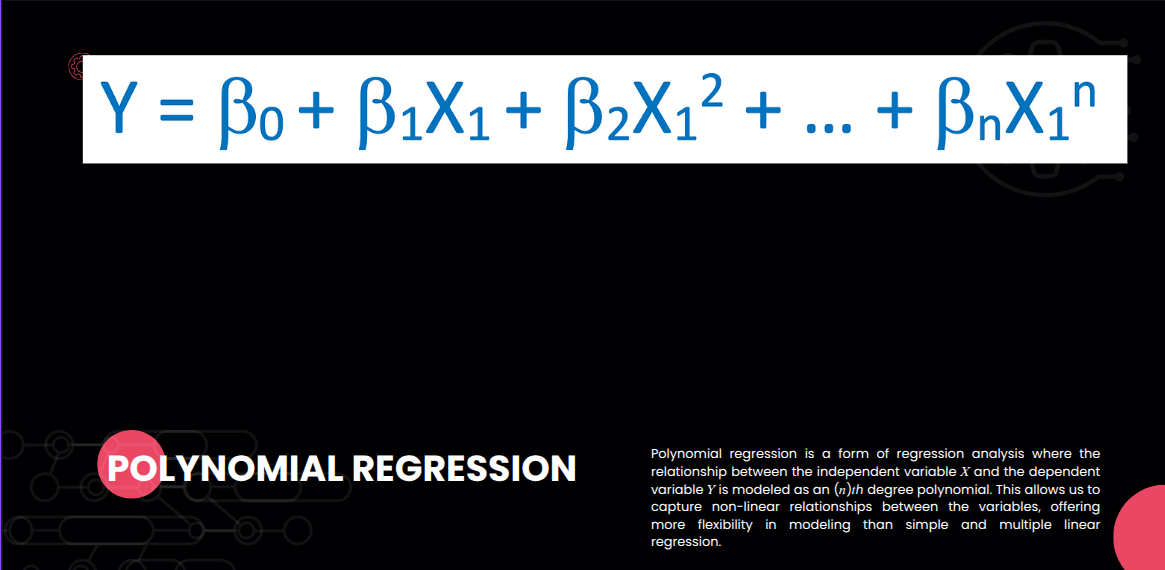

**When Linear Isn't Enough:**
Sometimes the relationship between features and target follows curves rather than straight lines. Polynomial regression captures these patterns by creating polynomial features.



**Mathematical Extension:**
For a single feature: `**y = β₀ + β₁x + β₂x² + β₃x³ + ... + βₙxⁿ**`
For multiple features: Include interaction terms like `x₁x₂, x₁²,` etc.

In [ ]:
# Implementation: Polynomial Regression for Cooling Load

# Focus on cooling load (often has more non-linear relationships)
y = energy_df['Cooling_Load']

# Select key features that showed non-linear patterns
key_features = ['Relative_Compactness', 'Glazing_Area', 'Glazing_Area_Distribution', 'Wall_Area', 'Orientation']

X = energy_df[key_features]

In [ ]:
X.columns

Index(['Relative_Compactness', 'Glazing_Area', 'Glazing_Area_Distribution',
       'Wall_Area', 'Orientation'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare different polynomial degrees

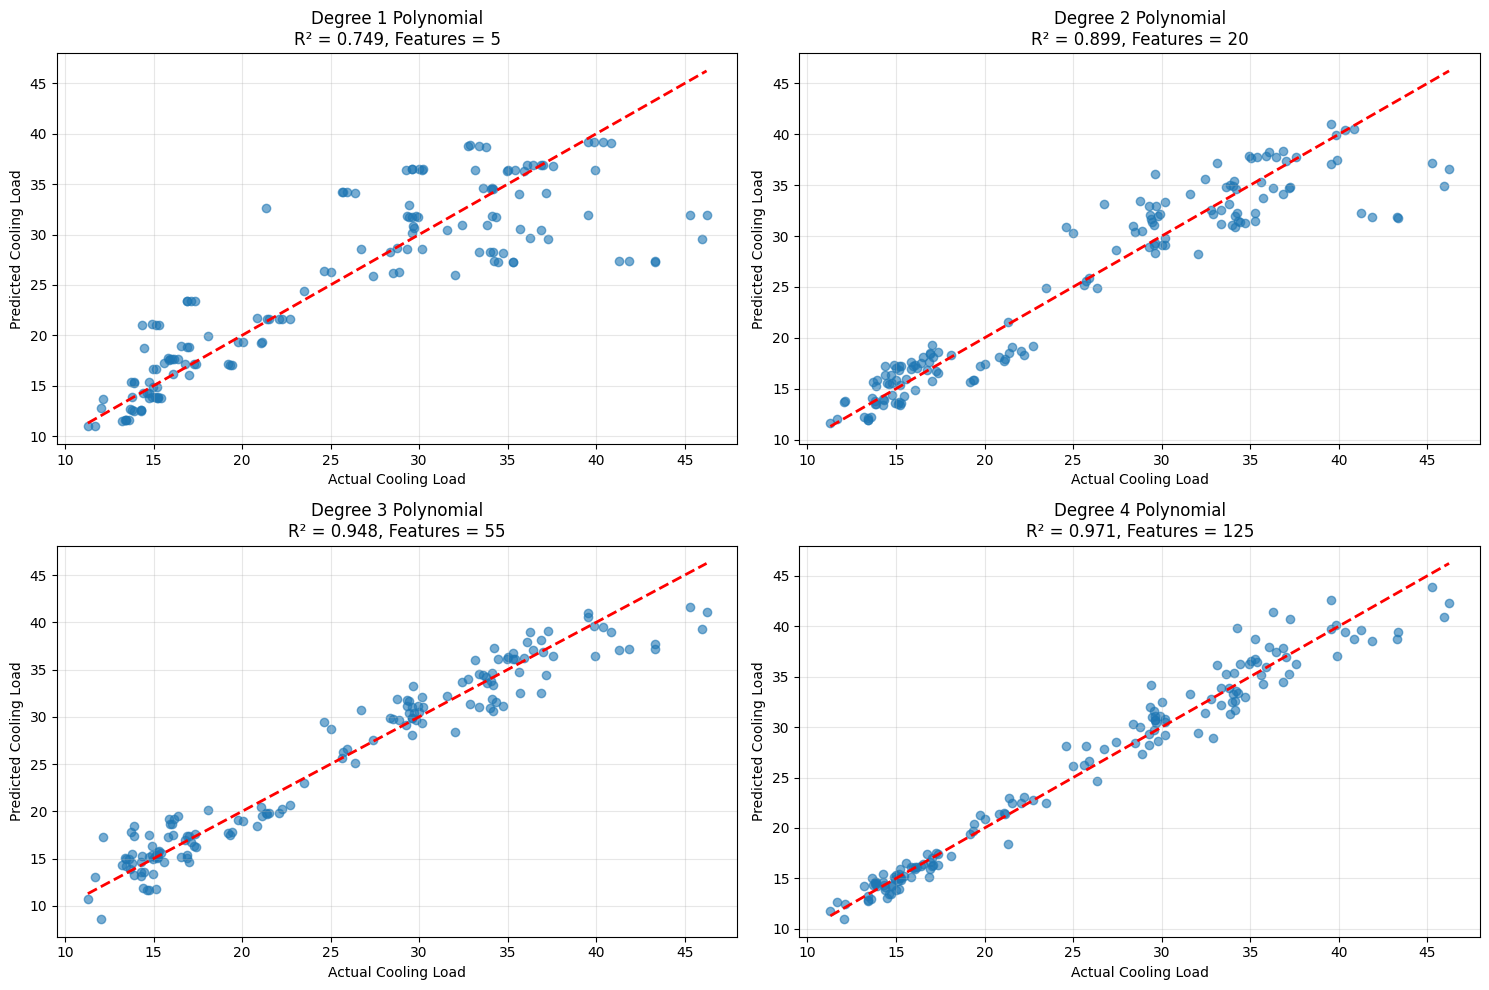

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Compare different polynomial degrees
degrees = [1, 2, 3, 4]
poly_results = {}

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly_transformed = poly_features.fit_transform(X_train)
    X_test_poly_transformed = poly_features.transform(X_test)

    # Fit model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly_transformed, y_train)

    # Predictions
    y_pred_train_poly = poly_model.predict(X_train_poly_transformed)
    y_pred_test_poly = poly_model.predict(X_test_poly_transformed)

    # Metrics
    train_mse_poly = mean_squared_error(y_train, y_pred_train_poly)
    test_mse_poly = mean_squared_error(y_test, y_pred_test_poly)
    train_r2_poly = r2_score(y_train, y_pred_train_poly)
    test_r2_poly = r2_score(y_test, y_pred_test_poly)

    # Store results
    poly_results[degree] = {
        'train_mse': train_mse_poly,
        'test_mse': test_mse_poly,
        'train_r2': train_r2_poly,
        'test_r2': test_r2_poly,
        'num_features': X_train_poly_transformed.shape[1]
    }

    # Visualize results
    plt.subplot(2, 2, i+1)
    plt.scatter(y_test, y_pred_test_poly, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Cooling Load')
    plt.ylabel('Predicted Cooling Load')
    plt.title(f'Degree {degree} Polynomial\nR² = {test_r2_poly:.3f}, Features = {X_train_poly_transformed.shape[1]}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [ ]:
X_test_poly_transformed.shape

(154, 125)

In [ ]:
X_train_poly_transformed.shape

(614, 125)

# Understanding Overfitting in Polynomial Regression

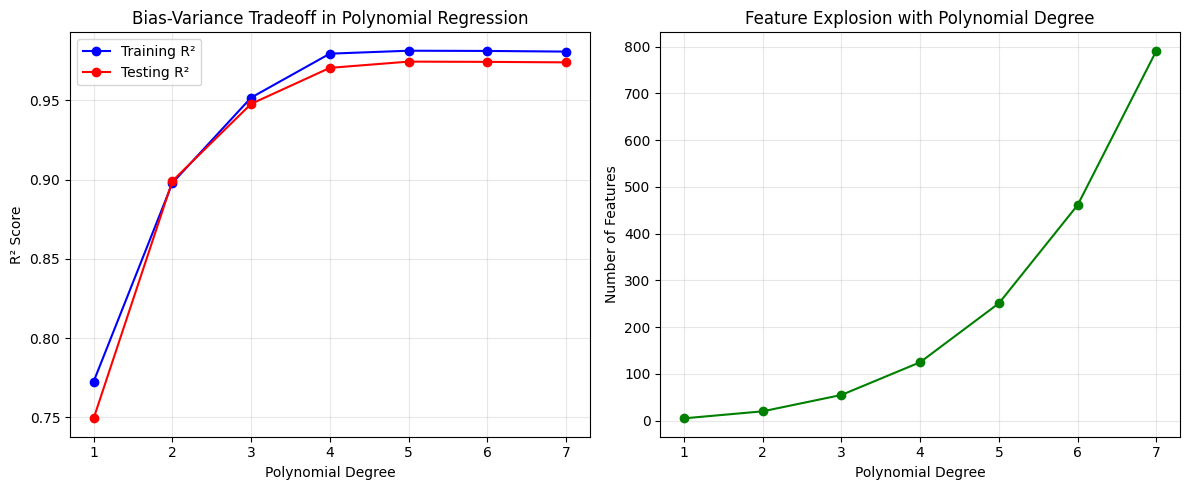

In [ ]:
# Demonstrate overfitting with increasing polynomial degrees
degrees_extended = range(1, 8)
train_scores = []
test_scores = []
feature_counts = []

for degree in degrees_extended:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_transformed = poly_features.fit_transform(X_train)
    X_test_transformed = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transformed, y_train)

    train_score = model.score(X_train_transformed, y_train)
    test_score = model.score(X_test_transformed, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    feature_counts.append(X_train_transformed.shape[1])

# Visualize bias-variance tradeoff
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees_extended, train_scores, 'o-', color='blue', label='Training R²')
plt.plot(degrees_extended, test_scores, 'o-', color='red', label='Testing R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Bias-Variance Tradeoff in Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(degrees_extended, feature_counts, 'o-', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('Number of Features')
plt.title('Feature Explosion with Polynomial Degree')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "="*50)
print("OVERFITTING ANALYSIS:")
print("="*50)
optimal_degree = degrees_extended[np.argmax(test_scores)]
print(f"Optimal polynomial degree: {optimal_degree}")
print(f"Best test R²: {max(test_scores):.3f}")
print(f"Number of features at optimal degree: {feature_counts[optimal_degree-1]}")


OVERFITTING ANALYSIS:
Optimal polynomial degree: 5
Best test R²: 0.974
Number of features at optimal degree: 251


# Building on Lesson 2: Detecting and Fixing Overfitting

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
print("LESSON 3: ADVANCED REGRESSION - OVERFITTING & REGULARIZATION")
print("="*70)
print("Building on Lesson 2: We saw polynomial models can overfit.")
print("Today: Learn to detect overfitting and fix it with regularization!")

LESSON 3: ADVANCED REGRESSION - OVERFITTING & REGULARIZATION
Building on Lesson 2: We saw polynomial models can overfit.
Today: Learn to detect overfitting and fix it with regularization!


In [ ]:
print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Target: Cooling Load")

Dataset: 768 samples, 5 features
Target: Cooling Load


### ============================================================================
### PART 1: OVERFITTING DETECTION - Building on Lesson 2 Results
### ============================================================================

In [ ]:
print("\n" + "="*50)
print(" PART 1: DETECTING OVERFITTING")
print("="*50)
print("In Lesson 2, we saw polynomial degree affected performance.")
print("Let's examine this more systematically...")


🔍 PART 1: DETECTING OVERFITTING
In Lesson 2, we saw polynomial degree affected performance.
Let's examine this more systematically...


In [ ]:
# Test polynomial degrees from 1 to 10 (more extreme than Lesson 2)
degrees = range(1, 25)
results = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Calculate scores
    train_r2 = model.score(X_train_poly, y_train)
    test_r2 = model.score(X_test_poly, y_test)

    # Store results
    results.append({
        'degree': degree,
        'features': X_train_poly.shape[1],
        'train_r2': train_r2,
        'test_r2': test_r2,
        'gap': train_r2 - test_r2  # KEY OVERFITTING INDICATOR
    })


In [ ]:
# Convert to DataFrame for easy analysis
results_df = pd.DataFrame(results)

results_df

,degree,features,train_r2,test_r2,gap
0,1,5,0.772603,0.749365,0.023238
1,2,20,0.897880,0.899145,-0.001264
2,3,55,0.951771,0.947809,0.003962
3,4,125,0.979502,0.970540,0.008962
4,5,251,0.981363,0.974481,0.006882
5,6,461,0.981218,0.974324,0.006895
6,7,791,0.980808,0.974015,0.006793
7,8,1286,0.980084,0.974723,0.005361
8,9,2001,0.978787,0.973291,0.005496
9,10,3002,0.978162,0.972667,0.005495


In [ ]:
print("\n OVERFITTING ANALYSIS:")
print("Degree | Features | Train R² | Test R² | Gap (Overfitting)")
print("-" * 55)
for _, row in results_df.iterrows():
    gap_indicator = "Overfitting warning!" if row['gap'] > 0.03 else "Good!"
    print(f"{row['degree']:8f} | {row['features']:8f} | {row['train_r2']:8.3f} | {row['test_r2']:7.3f} | {row['gap']:4.3f} {gap_indicator}")


 OVERFITTING ANALYSIS:
Degree | Features | Train R² | Test R² | Gap (Overfitting)
-------------------------------------------------------
1.000000 | 5.000000 |    0.773 |   0.749 | 0.023 Good!
2.000000 | 20.000000 |    0.898 |   0.899 | -0.001 Good!
3.000000 | 55.000000 |    0.952 |   0.948 | 0.004 Good!
4.000000 | 125.000000 |    0.980 |   0.971 | 0.009 Good!
5.000000 | 251.000000 |    0.981 |   0.974 | 0.007 Good!
6.000000 | 461.000000 |    0.981 |   0.974 | 0.007 Good!
7.000000 | 791.000000 |    0.981 |   0.974 | 0.007 Good!
8.000000 | 1286.000000 |    0.980 |   0.975 | 0.005 Good!
9.000000 | 2001.000000 |    0.979 |   0.973 | 0.005 Good!
10.000000 | 3002.000000 |    0.978 |   0.973 | 0.005 Good!
11.000000 | 4367.000000 |    0.977 |   0.970 | 0.007 Good!
12.000000 | 6187.000000 |    0.943 |   0.936 | 0.007 Good!
13.000000 | 8567.000000 |    0.941 |   0.932 | 0.008 Good!
14.000000 | 11627.000000 |    0.937 |   0.928 | 0.009 Good!
15.000000 | 15503.000000 |    0.926 |   0.913 | 0.013

### ============================================================================
### Visualizing Overfitting/Underfitting
### ============================================================================

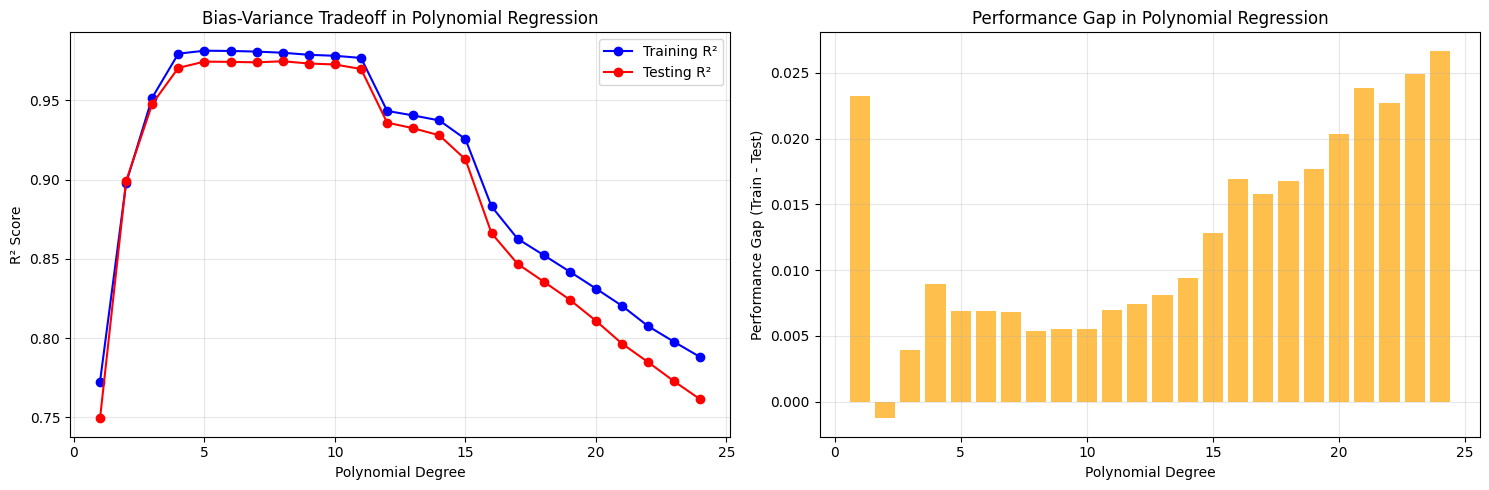

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(results_df['degree'], results_df['train_r2'], 'o-', color= 'blue', label='Training R²')
plt.plot(results_df['degree'], results_df['test_r2'], 'o-', color = 'red', label = 'Testing R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Bias-Variance Tradeoff in Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(results_df['degree'], results_df['gap'], color = 'orange', alpha = 0.7)
plt.xlabel('Polynomial Degree')
plt.ylabel('Performance Gap (Train - Test)')
plt.title('Performance Gap in Polynomial Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print(f"\n KEY INSIGHT: Gap > 0.03 indicates overfitting!")
print(f"   Degree 1: Gap = {results_df.iloc[0]['gap']:.3f}  Good")
print(f"   Degree 10: Gap = {results_df.iloc[9]['gap']:.3f}  Overfitting!")



 KEY INSIGHT: Gap > 0.03 indicates overfitting!
   Degree 1: Gap = 0.023  Good
   Degree 10: Gap = 0.005  Overfitting!


### ============================================================================
### PART 2: CROSS-VALIDATION - Better Overfitting Detection
### ============================================================================

In [ ]:
print("\n" + "="*50)
print("PART 2: CROSS-VALIDATION FOR ROBUST EVALUATION")
print("="*50)
print("Single train-test split can be misleading.")
print("Cross-validation gives us a more reliable picture...")



PART 2: CROSS-VALIDATION FOR ROBUST EVALUATION
Single train-test split can be misleading.
Cross-validation gives us a more reliable picture...


In [ ]:
def evaluate_with_cv(degree, X, y, cv = 5):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=cv, scoring = 'r2')

    return scores.mean(), scores.std()



In [ ]:
#using the same degree defined before
degrees = range(1, 25)

cv_results = []

for degree in degrees:
  cv_mean_score, cv_std_score = evaluate_with_cv(degree, X, y)

  cv_results.append(
      {
          'degree': degree,
          'cv_mean_score': cv_mean_score,
          'cv_std_score': cv_std_score
      }
  )

  #interpretation
  if cv_std_score > 0.03:
    interpretation = 'High variance (unstable) '

  elif cv_mean_score < 0.85:
    interpretation = 'Low performance '

  else:
    interpretation = 'Good balance '

  print(f"{degree:2d} | {cv_mean_score:.3f} | {cv_std_score:.3f} | {interpretation}")

print(f"\n TIP: High standard deviation = high variance = overfitting!")

 1 | 0.745 | 0.056 | High variance (unstable) 
 2 | 0.886 | 0.018 | Good balance 
 3 | 0.934 | 0.019 | Good balance 
 4 | 0.850 | 0.143 | High variance (unstable) 
 5 | 0.699 | 0.239 | High variance (unstable) 
 6 | 0.641 | 0.323 | High variance (unstable) 
 7 | 0.817 | 0.199 | High variance (unstable) 
 8 | 0.940 | 0.044 | High variance (unstable) 
 9 | 0.933 | 0.066 | High variance (unstable) 
10 | 0.957 | 0.017 | Good balance 
11 | 0.949 | 0.024 | Good balance 
12 | 0.911 | 0.032 | High variance (unstable) 
13 | 0.911 | 0.031 | High variance (unstable) 
14 | 0.910 | 0.033 | High variance (unstable) 
15 | 0.865 | 0.074 | High variance (unstable) 
16 | 0.781 | 0.151 | High variance (unstable) 
17 | 0.820 | 0.052 | High variance (unstable) 
18 | 0.808 | 0.053 | High variance (unstable) 
19 | 0.797 | 0.054 | High variance (unstable) 
20 | 0.796 | 0.043 | High variance (unstable) 
21 | 0.786 | 0.040 | High variance (unstable) 
22 | 0.781 | 0.038 | High variance (unstable) 
23 | 0.770 | 0

### ============================================================================
### PART 3: REGULARIZATION - The Solution
### ============================================================================



In [ ]:
print("\n" + "="*50)
print(" PART 3: REGULARIZATION - FIXING OVERFITTING")
print("="*50)
print("Problem: High-degree polynomials overfit")
print("Solution: Regularization penalizes large coefficients")


🛡️ PART 3: REGULARIZATION - FIXING OVERFITTING
Problem: High-degree polynomials overfit
Solution: Regularization penalizes large coefficients


In [ ]:
# Use degree 5 polynomial (showed overfitting above)
problem_degree = 5
poly = PolynomialFeatures(degree=problem_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"\nUsing degree {problem_degree} polynomial: {X_train_poly.shape[1]} features")

# IMPORTANT: Standardize features for regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

print(" Features standardized (required for regularization)")

# Compare different regularization methods
models = {
    'No Regularization': LinearRegression(),
    'Ridge (L2)' : Ridge(alpha = 1.0),
    'Lasso (L1)' : Lasso(alpha = 0.1),
    'ElasticNet (L1 + L2)' : ElasticNet(alpha = 0.1, l1_ratio=0.5)
}

print(f"\n REGULARIZATION COMPARISON:")
print("Method\t\t\t\t| Train R² | Test R² | Gap | Features Used ")
print("-" * 65)

comparison_results = []

for name, model in models.items():

  model.fit(X_train_scaled, y_train)

  y_train_pred = model.predict(X_train_scaled)
  y_test_pred = model.predict(X_test_scaled)

  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  gap = train_r2 - test_r2

   # Count non-zero coefficients (for Lasso)
  if hasattr(model, 'coef_'):
      features_used = np.sum(np.abs(model.coef_) > 1e-10)
  else:
      features_used = X_train_scaled.shape[1]

  comparison_results.append(
      {
          'method': name,
          'train_r2': train_r2,
          'test_r2': test_r2,
          'gap (train_r2 - test_r2)': gap,
          'features used': features_used
      }
  )

  print(f'{name:18}\t{train_r2:>15.3f}\t\t{test_r2:.3f}\t{gap:.3f}\t{features_used:4d}')


Using degree 5 polynomial: 251 features
 Features standardized (required for regularization)

 REGULARIZATION COMPARISON:
Method				| Train R² | Test R² | Gap | Features Used 
-----------------------------------------------------------------
No Regularization 	          0.990		0.980	0.010	 251
Ridge (L2)        	          0.912		0.908	0.005	 251
Lasso (L1)        	          0.886		0.878	0.008	   9
ElasticNet (L1 + L2)	          0.864		0.850	0.014	  52


### ============================================================================
### PART 4: HYPERPARAMETER TUNING - Finding the Best Regularization
### ============================================================================



In [ ]:
print("\n" + "="*50)
print(" PART 4: HYPERPARAMETER TUNING")
print("="*50)
print("Different alpha values control regularization strength...")


 PART 4: HYPERPARAMETER TUNING
Different alpha values control regularization strength...


In [ ]:
# Test different alpha values for Ridge
alphas = [0.01, 0.1, 1, 10, 100]
ridge_results = []

print(f"\n RIDGE REGULARIZATION TUNING:")
print("Alpha\t\t|Train R²|Test R² | Gap")
print("-" * 35)

for alpha in alphas:
  model = Ridge(alpha = alpha)
  model.fit(X_train_scaled, y_train)

  train_score = model.score(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled, y_test)

  gap = train_score - test_score

  ridge_results.append(
      {
          'alpha' : alpha,
          'train_r2': train_score,
          'test_r2': test_score,
          'gap': gap
      }
  )

  print(f'{alpha:5f}\t|{train_score:3f}|{test_score:3f}|{gap:3f}')




 RIDGE REGULARIZATION TUNING:
Alpha		|Train R²|Test R² | Gap
-----------------------------------
0.010000	|0.946344|0.936645|0.009699
0.100000	|0.935262|0.931324|0.003939
1.000000	|0.912011|0.907502|0.004509
10.000000	|0.896371|0.889313|0.007058
100.000000	|0.850102|0.834292|0.015810


In [ ]:
# Find best alpha (lowest gap while maintaining performance)
ridge_df = pd.DataFrame(ridge_results)

ridge_df

,alpha,train_r2,test_r2,gap
0,0.01,0.946344,0.936645,0.009699
1,0.10,0.935262,0.931324,0.003939
2,1.00,0.912011,0.907502,0.004509
3,10.00,0.896371,0.889313,0.007058
4,100.00,0.850102,0.834292,0.015810


In [ ]:
#get index of the best performing index from test column
best_alpha_index = np.argmax(ridge_df['test_r2'])

best_alpha = ridge_df.loc[best_alpha_index, 'alpha']

print(f"\n BEST ALPHA: {best_alpha}")
print(f"   Test R²: {ridge_df.iloc[best_alpha_index]['test_r2']:.3f}")
print(f"   Gap: {ridge_df.iloc[best_alpha_index]['gap']:.3f}")


 BEST ALPHA: 0.01
   Test R²: 0.937
   Gap: 0.010


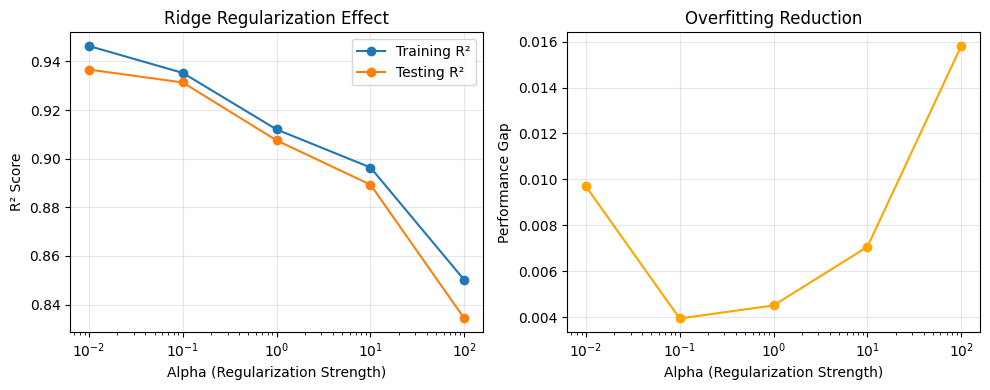

In [ ]:
# Visualize regularization effect
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.semilogx(ridge_df['alpha'], ridge_df['train_r2'], 'o-', label='Training R²')
plt.semilogx(ridge_df['alpha'], ridge_df['test_r2'], 'o-', label='Testing R²')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regularization Effect')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogx(ridge_df['alpha'], ridge_df['gap'], 'o-', color='orange')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Performance Gap')
plt.title('Overfitting Reduction')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*50)
print(" PART 5: PRACTICAL DECISION FRAMEWORK")
print("="*50)

def recommend_approach(n_samples, n_features, gap):
    """Recommend regularization approach based on data characteristics"""

    print(f" YOUR DATA:")
    print(f"   Samples: {n_samples}")
    print(f"   Features: {n_features}")
    print(f"   Feature/Sample Ratio: {n_features/n_samples:.2f}")
    print(f"   Overfitting Gap: {gap:.3f}")

    print(f"\n RECOMMENDATION:")

    if gap < 0.02:
        print("    No significant overfitting - keep current model")
    elif n_features > n_samples:
        print("    Use LASSO - you have more features than samples")
        print("    LASSO will automatically select important features")
    elif gap > 0.1:
        print("    Use RIDGE - strong regularization needed")
        print("    High overfitting requires coefficient shrinkage")
    else:
        print("    Use ELASTICNET - balanced approach")
        print("    Combines benefits of Ridge and Lasso")

# Apply to our polynomial case
current_samples = X_train_scaled.shape[0]
current_features = X_train_scaled.shape[1]
current_gap = results_df[results_df['degree'] == problem_degree]['gap'].iloc[0]

recommend_approach(current_samples, current_features, current_gap)

print(f"\n KEY TAKEAWAYS:")
print("1.  Performance gap (train - test) indicates overfitting")
print("2.  Cross-validation gives more reliable evaluation")
print("3.  Regularization prevents overfitting by penalizing complexity")
print("4.  Hyperparameter tuning finds the right regularization strength")
print("5.  Choose regularization method based on your data characteristics")


 PART 5: PRACTICAL DECISION FRAMEWORK
 YOUR DATA:
   Samples: 614
   Features: 251
   Feature/Sample Ratio: 0.41
   Overfitting Gap: 0.007

 RECOMMENDATION:
    No significant overfitting - keep current model

 KEY TAKEAWAYS:
1.  Performance gap (train - test) indicates overfitting
2.  Cross-validation gives more reliable evaluation
3.  Regularization prevents overfitting by penalizing complexity
4.  Hyperparameter tuning finds the right regularization strength
5.  Choose regularization method based on your data characteristics


# **Interactive Coding exercises**

*Follow the links below to practice all these concepts*


1.   [Hands_on_Practice](https://colab.research.google.com/drive/1eh3epDqP3eltwJ76kHCTyIQSx0prplQx?usp=sharing)




# **Practice Homework**

*Follow the link below for practice questions*

[African institute for Artificiall Intellgence - AI masterclass](https://github.com/aljebraschool/African-Institute-For-Artificial-Intelligence---AI-Masterclass)

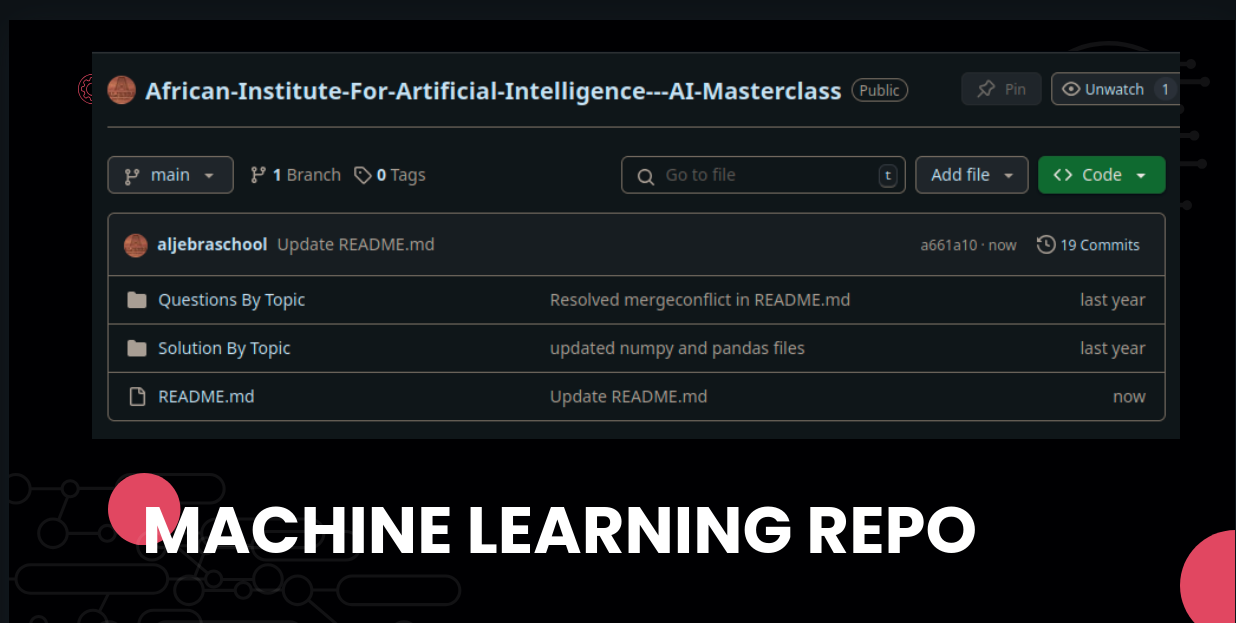

**Other social media links**



*   [Read more on the topic via my blog](https://aljebraschool.hashnode.dev)
*   [Follow me on Linkedin](https://linkedin.com/in/aljebraschool)

